In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.tree import plot_tree
from IPython.display import Image

In [10]:
df = pd.read_csv("cell_types_specimen_details.csv")
new_df = df.filter(['specimen__hemisphere', 'structure_parent__acronym','tag__dendrite_type', 'donor__species','structure__layer','line_name'])
#drops rows with sparsly spiny as dendrite type
new_df.drop(new_df.index[new_df['tag__dendrite_type'] == 'sparsely spiny'], inplace=True)



In [4]:
df.head()

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,NaN,525011903,H16.03.003.01.14.02,right,12113,"""frontal lobe""",FroL,12113,FroL,3,...,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142,25 yrs,Male,epilepsy,White or Caucasian,9.0,Homo Sapiens,524848408,H16.03.003
1,Oxtr-T2A-Cre,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,left,778,"""Primary visual area, layer 5""",VISp5,385,VISp,5,...,/api/v2/well_known_file_download/566738214,/api/v2/well_known_file_download/566738219,NaN,NaN,NaN,NaN,NaN,Mus musculus,563340157,Oxtr-T2A-Cre;Ai14-293837
2,Pvalb-IRES-Cre,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487618917,/api/v2/well_known_file_download/491380580,NaN,NaN,NaN,NaN,NaN,Mus musculus,319194354,Pvalb-IRES-Cre;Ai14(IVSCC)-170927
3,NaN,528642047,H16.06.009.01.02.06.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,5,...,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
4,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,right,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/657612184,/api/v2/well_known_file_download/657612186,NaN,NaN,NaN,NaN,NaN,Mus musculus,605622695,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419


In [11]:
new_df = new_df.reset_index(drop=True)
new_df=new_df.fillna(0)
new_df.loc[new_df.line_name == 0, "line_name"] = "Unknown"
new_df.head()

,specimen__hemisphere,structure_parent__acronym,tag__dendrite_type,donor__species,structure__layer,line_name
0,right,FroL,spiny,Homo Sapiens,3,Unknown
1,left,VISp,aspiny,Mus musculus,5,Oxtr-T2A-Cre
2,right,VISp,aspiny,Mus musculus,4,Pvalb-IRES-Cre
3,left,MTG,aspiny,Homo Sapiens,5,Unknown
4,right,VISp,aspiny,Mus musculus,2/3,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre


In [12]:
features = ['specimen__hemisphere','structure_parent__acronym','donor__species','structure__layer','line_name']
inputs = new_df[features]
outputs = new_df['tag__dendrite_type']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le_hemisphere = LabelEncoder()
le_parent_acronym = LabelEncoder()
le_donor = LabelEncoder()
le_tag_dendrite = LabelEncoder()
le_line_name = LabelEncoder()
le_tag_layer = LabelEncoder()

In [15]:
inputs['hemi_n'] = le_hemisphere.fit_transform(new_df['specimen__hemisphere'])
inputs['donor_n'] = le_hemisphere.fit_transform(new_df['donor__species'])
inputs['parent_acro_n'] = le_hemisphere.fit_transform(new_df['structure_parent__acronym'])
inputs['tag_dendrite_n'] = le_hemisphere.fit_transform(new_df['tag__dendrite_type'])
inputs['line_name_n'] = le_hemisphere.fit_transform(new_df['line_name'])
inputs['structure_layer_n'] = le_hemisphere.fit_transform(new_df['structure__layer'])

In [16]:
inputs.head()

,specimen__hemisphere,structure_parent__acronym,donor__species,structure__layer,line_name,hemi_n,donor_n,parent_acro_n,tag_dendrite_n,line_name_n,structure_layer_n
0,right,FroL,Homo Sapiens,3,Unknown,1,0,3,1,34,3
1,left,VISp,Mus musculus,5,Oxtr-T2A-Cre,0,1,25,0,20,5
2,right,VISp,Mus musculus,4,Pvalb-IRES-Cre,1,1,25,0,22,4
3,left,MTG,Homo Sapiens,5,Unknown,0,0,7,0,34,5
4,right,VISp,Mus musculus,2/3,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,1,1,25,0,31,2


In [17]:
inputs_n = inputs.drop(['specimen__hemisphere','structure_parent__acronym','donor__species','donor__species','structure__layer','line_name'], axis  = 'columns')

In [18]:
inputs_n.head(10)

,hemi_n,donor_n,parent_acro_n,tag_dendrite_n,line_name_n,structure_layer_n
0,1,0,3,1,34,3
1,0,1,25,0,20,5
2,1,1,25,0,22,4
3,0,0,7,0,34,5
4,1,1,25,0,31,2
5,1,0,7,1,34,4
6,1,1,25,1,4,5
7,0,1,25,1,28,5
8,1,1,25,0,12,2
9,1,1,25,1,26,5


In [19]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [20]:
inputs_n = inputs_n.reset_index(drop=True)
X = inputs_n.drop(['tag_dendrite_n'], axis = 1)
y = inputs_n['tag_dendrite_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = tree.DecisionTreeClassifier(criterion = 'entropy')


In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
inputs_n.head()

,hemi_n,donor_n,parent_acro_n,tag_dendrite_n,line_name_n,structure_layer_n
0,1,0,3,1,34,3
1,0,1,25,0,20,5
2,1,1,25,0,22,4
3,0,0,7,0,34,5
4,1,1,25,0,31,2


In [23]:
model.score(X_train,y_train)

0.9338731443994602

In [ ]:
df = pd.read_csv("cell_types_specimen_details.csv")
new_df = df.filter(['specimen__hemisphere', 'structure_parent__acronym','tag__dendrite_type', 'donor__species','structure__layer','line_name'])
#drops rows with sparsly spiny as dendrite type
new_df.drop(new_df.index[new_df['tag__dendrite_type'] == 'sparsely spiny'], inplace=True)
new_df = new_df.reset_index(drop=True)
new_df=new_df.fillna(0)
new_df.loc[new_df.line_name == 0, "line_name"] = "Unknown"
new_df.head()

In [3]:
def DecisionTreeClassifier():
    features = ['specimen__hemisphere','structure_parent__acronym','donor__species','structure__layer','line_name']
    inputs = new_df[features]
    outputs = new_df['tag__dendrite_type']
    le_hemisphere = LabelEncoder()
    le_parent_acronym = LabelEncoder()
    le_donor = LabelEncoder()
    le_tag_dendrite = LabelEncoder()
    le_line_name = LabelEncoder()
    le_tag_layer = LabelEncoder()
    inputs['hemi_n'] = le_hemisphere.fit_transform(new_df['specimen__hemisphere'])
    inputs['donor_n'] = le_hemisphere.fit_transform(new_df['donor__species'])
    inputs['parent_acro_n'] = le_hemisphere.fit_transform(new_df['structure_parent__acronym'])
    inputs['tag_dendrite_n'] = le_hemisphere.fit_transform(new_df['tag__dendrite_type'])
    inputs['line_name_n'] = le_hemisphere.fit_transform(new_df['line_name'])
    inputs['structure_layer_n'] = le_hemisphere.fit_transform(new_df['structure__layer'])
    inputs_n = inputs_n.reset_index(drop=True)
    X = inputs_n.drop(['tag_dendrite_n'], axis = 1)
    y = inputs_n['tag_dendrite_n']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    model = tree.DecisionTreeClassifier(criterion = 'entropy')
    model.fit(X_train, y_train)


In [4]:
def confusion_mat():
        pred = model.predict(X_train)
        array = (confusion_matrix(y_train, pred))
        statement = "The confusion matrix for this model is shown here:"
        return array, statement
       

In [5]:
def accuracy_model():
        pred = model.predict(X_train)
        accuracy = "The model's accuracy is", + model.score(X_train,y_train)
        return accuracy

In [114]:
features = ['specimen__hemisphere','structure_parent__acronym','donor__species','structure__layer','line_name']
inputs = new_df[features]
outputs = new_df['tag__dendrite_type']
le_hemisphere = LabelEncoder()
le_parent_acronym = LabelEncoder()
le_donor = LabelEncoder()
le_tag_dendrite = LabelEncoder()
le_line_name = LabelEncoder()
le_tag_layer = LabelEncoder()
inputs['hemi_n'] = le_hemisphere.fit_transform(new_df['specimen__hemisphere'])
inputs['donor_n'] = le_hemisphere.fit_transform(new_df['donor__species'])
inputs['parent_acro_n'] = le_hemisphere.fit_transform(new_df['structure_parent__acronym'])
inputs['tag_dendrite_n'] = le_hemisphere.fit_transform(new_df['tag__dendrite_type'])
inputs['line_name_n'] = le_hemisphere.fit_transform(new_df['line_name'])
inputs['structure_layer_n'] = le_hemisphere.fit_transform(new_df['structure__layer'])
inputs_n = inputs_n.reset_index(drop=True)
X = inputs_n.drop(['tag_dendrite_n'], axis = 1)
y = inputs_n['tag_dendrite_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = tree.DecisionTreeClassifier(criterion = 'gini', )
model.fit(X_train, y_train)




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
accuracy_model()

("The model's accuracy is", 0.868421052631579)

In [108]:
confusion_mat()

(array([[517, 156],
        [ 39, 770]]), 'The confusion matrix for this model is shown here:')

In [113]:
model.score(X_test, y_test)

0.7606019151846786

In [8]:
#reads csv file
df = pd.read_csv("cell_types_specimen_details.csv")
#filter to columns we want
new_df = df.filter(['specimen__id','specimen__hemisphere','structure__name', 'structure_parent__acronym','ef__avg_firing_rate','tag__dendrite_type', 'donor__species'])
#drops rows with null values
new_df.dropna(inplace = True)
#drops rows with sparsly spiny as dendrite type
new_df.drop(new_df.index[new_df['tag__dendrite_type'] == 'sparsely spiny'], inplace=True)
#creates new column with left as 1 and right as 0
new_df['specimen__hemisphere_left'] = new_df.specimen__hemisphere.map({'left': 1, 'right': 0})
#creates new column with spiny as 1 and aspiny as 0
new_df['tag__dendrite_type_spiny'] = new_df.tag__dendrite_type.map({'spiny': 1, 'aspiny': 0})
#creates new column with human as 1 and mouse as 0
new_df['donor_species_human'] = new_df.donor__species.map( {'Homo Sapiens': 1, 'Mus musculus': 0})


In [9]:
new_df.head()

,specimen__id,specimen__hemisphere,structure__name,structure_parent__acronym,ef__avg_firing_rate,tag__dendrite_type,donor__species,specimen__hemisphere_left,tag__dendrite_type_spiny,donor_species_human
0,525011903,right,"""frontal lobe""",FroL,13.572511,spiny,Homo Sapiens,0,1,1
2,469801138,right,"""Primary visual area, layer 4""",VISp,79.952029,aspiny,Mus musculus,0,0,0
3,528642047,left,"""middle temporal gyrus""",MTG,77.445126,aspiny,Homo Sapiens,1,0,1
4,605889373,right,"""Primary visual area, layer 2/3""",VISp,12.666099,aspiny,Mus musculus,0,0,0
5,537256313,right,"""middle temporal gyrus""",MTG,12.919897,spiny,Homo Sapiens,0,1,1


[Text(510.28150594773797, 525.48, 'X[3] <= 24.5\ngini = 0.496\nsamples = 1482\nvalue = [673, 809]'),
 Text(344.92789586583467, 489.24, 'X[3] <= 21.5\ngini = 0.471\nsamples = 737\nvalue = [458, 279]'),
 Text(253.7278666146646, 453.0, 'X[3] <= 17.5\ngini = 0.499\nsamples = 577\nvalue = [299, 278]'),
 Text(134.0048751950078, 416.76, 'X[3] <= 8.5\ngini = 0.469\nsamples = 445\nvalue = [278, 167]'),
 Text(66.59438377535102, 380.52, 'X[3] <= 2.5\ngini = 0.434\nsamples = 195\nvalue = [62, 133]'),
 Text(28.726989079563186, 344.28, 'X[3] <= 0.5\ngini = 0.351\nsamples = 75\nvalue = [58, 17]'),
 Text(23.503900156006242, 308.04, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(33.950078003120126, 308.04, 'X[4] <= 6.0\ngini = 0.494\nsamples = 38\nvalue = [21, 17]'),
 Text(20.89235569422777, 271.8, 'X[0] <= 0.5\ngini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(10.446177847113885, 235.56, 'X[4] <= 3.0\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(5.223088923556943, 199.32, 'gini = 0.0\

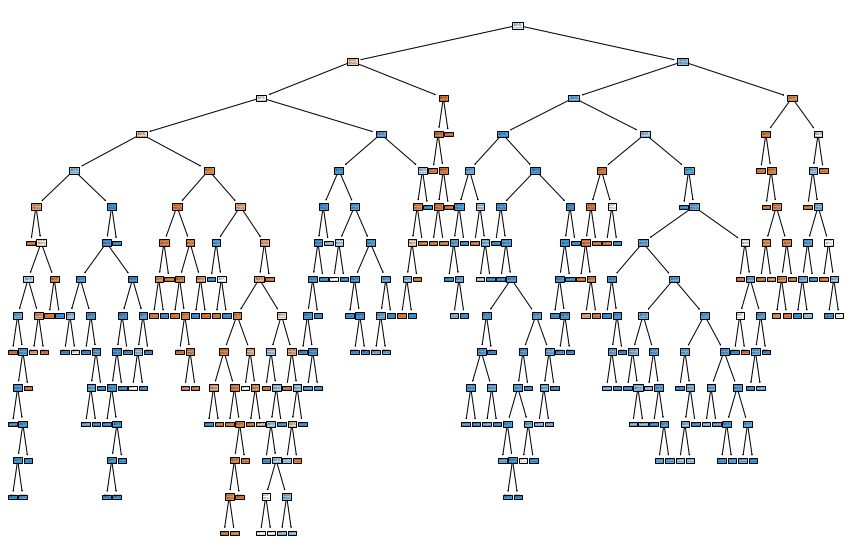

In [115]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled = True )

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def average(new_df, group_by_column, columns_to_average):
    avg = new_df.groupby(group_by_column)[columns_to_average].mean()
    return avg

def heatmapgen(new_df):

    #initialize new dataframe
    average_df = pd.DataFrame(new_df,columns=['structure_parent__acronym','ef__avg_firing_rate'])

    #sort data into buckets
    average_df.loc[average_df['ef__avg_firing_rate'] > 10, 'bucket'] = '10-20'
    average_df.loc[average_df['ef__avg_firing_rate'] > 20, 'bucket'] = '20-30'
    average_df.loc[average_df['ef__avg_firing_rate'] > 30, 'bucket'] = '30-40'
    average_df.loc[average_df['ef__avg_firing_rate'] > 40, 'bucket'] = '40-50'
    average_df.loc[average_df['ef__avg_firing_rate'] > 50, 'bucket'] = '50-60'
    average_df.loc[average_df['ef__avg_firing_rate'] > 60, 'bucket'] = '60-70'
    average_df.loc[average_df['ef__avg_firing_rate'] > 70, 'bucket'] = '70-80'
    average_df.loc[average_df['ef__avg_firing_rate'] > 80, 'bucket'] = '80-90'
    average_df.loc[average_df['ef__avg_firing_rate'] > 90, 'bucket'] = '90-100'
    average_df.loc[average_df['ef__avg_firing_rate'] > 100, 'bucket'] = '100-110'
    average_df.loc[average_df['ef__avg_firing_rate'] > 110, 'bucket'] = '110-120'
    average_df.loc[average_df['ef__avg_firing_rate'] > 120, 'bucket'] = '120-130'
    average_df.loc[average_df['ef__avg_firing_rate'] > 130, 'bucket'] = '130-140'
    average_df.loc[average_df['ef__avg_firing_rate'] > 140, 'bucket'] = '140-150'
    average_df.loc[average_df['ef__avg_firing_rate'] > 150, 'bucket'] = '150-160'

    #create heatmap
    heatmap_data = pd.pivot_table(average_df, values='ef__avg_firing_rate', index=['structure_parent__acronym'],columns=['bucket'])
    column_order = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160']
    heatmap_data = heatmap_data.reindex(column_order, axis=1)
    g = sns.heatmap(heatmap_data, yticklabels=1, cmap='coolwarm')
    plt.show()

df = pd.read_csv("cell_types_specimen_details.csv")
new_df = df.filter(['specimen__hemisphere', 'structure_parent__acronym','tag__dendrite_type', 'donor__species','structure__layer','line_name'])
#drops rows with sparsly spiny as dendrite type
new_df.drop(new_df.index[new_df['tag__dendrite_type'] == 'sparsely spiny'], inplace=True)
new_df = new_df.reset_index(drop=True)
new_df=new_df.fillna(0)
new_df.loc[new_df.line_name == 0, "line_name"] = "Unknown"
new_df.head()  
    
def DecisionTreeClassifier():
    features = ['specimen__hemisphere','structure_parent__acronym','donor__species','structure__layer','line_name']
    inputs = new_df[features]
    outputs = new_df['tag__dendrite_type']
    le_hemisphere = LabelEncoder()
    le_parent_acronym = LabelEncoder()
    le_donor = LabelEncoder()
    le_tag_dendrite = LabelEncoder()
    le_line_name = LabelEncoder()
    le_tag_layer = LabelEncoder()
    inputs['hemi_n'] = le_hemisphere.fit_transform(new_df['specimen__hemisphere'])
    inputs['donor_n'] = le_hemisphere.fit_transform(new_df['donor__species'])
    inputs['parent_acro_n'] = le_hemisphere.fit_transform(new_df['structure_parent__acronym'])
    inputs['tag_dendrite_n'] = le_hemisphere.fit_transform(new_df['tag__dendrite_type'])
    inputs['line_name_n'] = le_hemisphere.fit_transform(new_df['line_name'])
    inputs['structure_layer_n'] = le_hemisphere.fit_transform(new_df['structure__layer'])
    inputs_n = inputs_n.reset_index(drop=True)
    X = inputs_n.drop(['tag_dendrite_n'], axis = 1)
    y = inputs_n['tag_dendrite_n']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    model = tree.DecisionTreeClassifier(criterion = 'entropy')
    model.fit(X_train, y_train)
    
def confusion_mat():
    pred = model.predict(X_train)
    array = (confusion_matrix(y_train, pred))
    statement = "The confusion matrix for this model is shown here:"
    return array, statement
    
def accuracy_model():
        pred = model.predict(X_train)
        accuracy = "The model's accuracy is", + model.score(X_train,y_train)
        return accuracy
    
accuracy_model()
confusion_mat()
    
    
def main():
    #reads csv file
    df = pd.read_csv("cell_types_specimen_details.csv")
    #filter to columns we want
    new_df = df.filter(['specimen__id','specimen__hemisphere','structure__name', 'structure_parent__acronym','ef__avg_firing_rate','tag__dendrite_type', 'donor__species'])
    #drops rows with null values
    new_df.dropna(inplace = True)
    #drops rows with sparsly spiny as dendrite type
    new_df.drop(new_df.index[new_df['tag__dendrite_type'] == 'sparsely spiny'], inplace=True)
    #creates new column with left as 1 and right as 0
    new_df['specimen__hemisphere_left'] = new_df.specimen__hemisphere.map({'left': 1, 'right': 0})
    #creates new column with spiny as 1 and aspiny as 0
    new_df['tag__dendrite_type_spiny'] = new_df.tag__dendrite_type.map({'spiny': 1, 'aspiny': 0})
    #creates new column with human as 1 and mouse as 0
    new_df['donor_species_human'] = new_df.donor__species.map( {'Homo Sapiens': 1, 'Mus musculus': 0})
    pd.set_option('display.max_columns', None)
    #print(average(new_df, 'tag__dendrite_type_spiny', [ 'ef__avg_firing_rate' ]))
    heatmapgen(new_df)


if __name__ == '__main__':
    main()

